# Label Classifier (dSprites): Results

This notebook contains code used to present experiment results for the dSprites dataset.

In [1]:
import seaborn as sns
import matplotlib.style as style
import numpy as np
import torch
import random
from scipy.stats import ks_2samp, binom_test, chisquare, chi2_contingency, anderson_ksamp
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.io
from math import ceil
from copy import deepcopy
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import optimizers
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from tensorflow.python import keras
from tensorflow.python.keras import layers
from tqdm.notebook import tqdm
import pickle
from IPython.display import display, Markdown, Latex
from collections import Counter

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
style.use('fivethirtyeight')

In [2]:
# Mount drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Run utility functions
%run drive/MyDrive/Colab\ Notebooks/MPhil\ Project/Utilities.ipynb
%run drive/MyDrive/Colab\ Notebooks/MPhil\ Project/Experiment\ Utilities.ipynb

## Experiment Results

In [4]:
concept_names = ["color", "shape", "scale", "rotation", "x", "y"]


### BBSDs (Concepts)
The BBSDs (concepts) use the softmax outputs of each concept predictions as the reduced representation before applying multiple univariate and multidimensional statistical tests. Main visualisations are shown as follows:

1. **Bar plots**: we presented bar plots depicting the test statistics for each concept when making detections. The bar plots show how significant each concept is affected by the dataset shifts -- the more affected the concept, the higher the test statistics. We display these bar plots for all combinations of configurations (shift types, shift intensities, # of test samples, proportion of test data affected by shift).
2. **Detection accuracy tables**: we presented numerous tables depicting detection accuracy for combination of configurations (shift types, shift intensities, # of test samples, proportion of test data affected by shift) when employing BBSDs (concepts).

In addition to primary visualisations, we provide visualisations to identify key patterns from the detection accuracy tables or the bar plots.

#### Bar plots

###### Knockout Shift

In [5]:
shift_type = "ko"
dict_result_bbsds = load_dict_result(shift_type, "BBSDs_concepts")
dict_result_bbsdh = load_dict_result(shift_type, "BBSDh_concepts")

Loading file successfully.
Loading file successfully.


---

**Shift intensity**: medium

**# Test sample**: 500

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

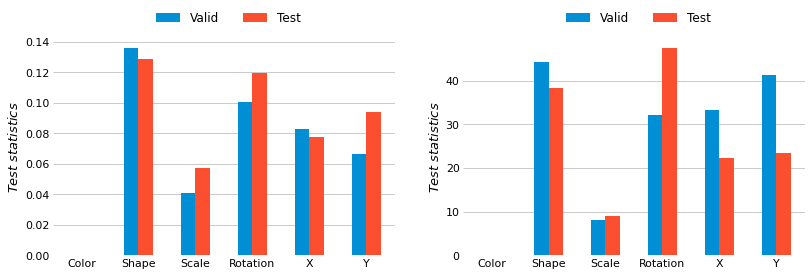

---

**Shift intensity**: medium

**# Test sample**: 1000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

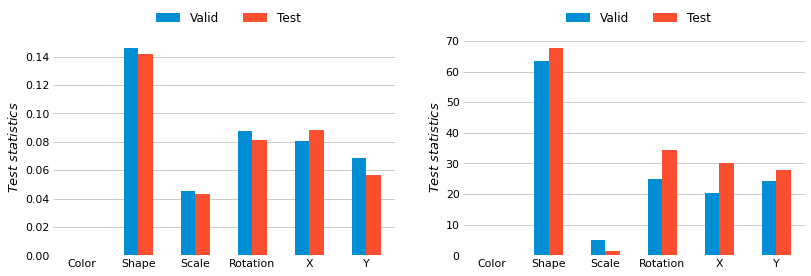

---

**Shift intensity**: medium

**# Test sample**: 10000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

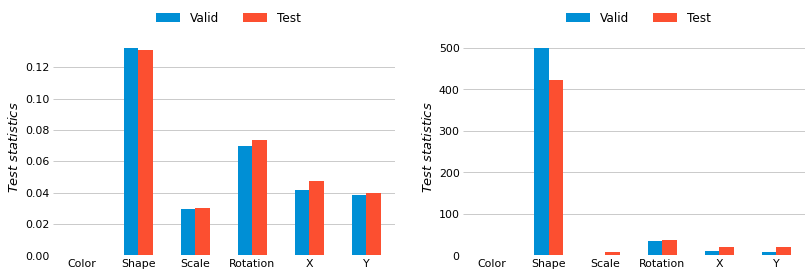

---

**Shift intensity**: large

**# Test sample**: 500

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

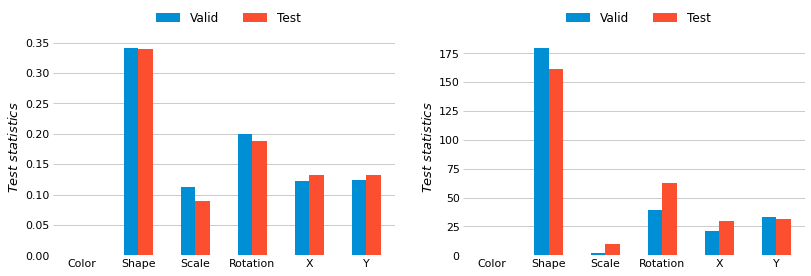

---

**Shift intensity**: large

**# Test sample**: 1000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

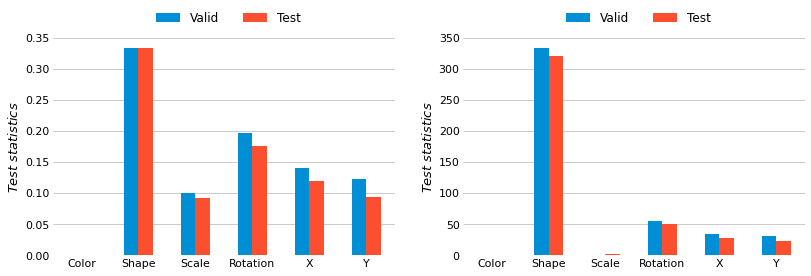

---

**Shift intensity**: large

**# Test sample**: 10000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

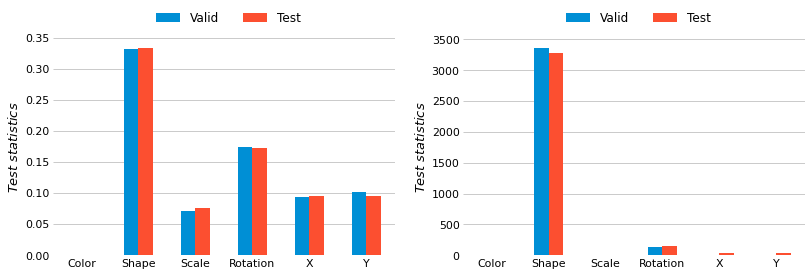

In [6]:
## Consider "bigger" and most significant shifts
shift_intensity_list = ["medium", "large"]
shift_prop_list = [1.0] # does not matter in knockout
test_sample_list = [500, 1000, 10000]
barplot_test_statistics(dict_result_bbsds, dict_result_bbsdh,
                        concept_names, shift_intensity_list, 
                        shift_prop_list, test_sample_list)

*Observation*: We observed that our algorithm can detect the concept (**shape**) that is most significantly affected by the shift correctly in the larger shifts scenario -- those affecting large proportion of test data, high intensity, and with considerable amount of given test sample which we have access to detect the shift.

##### Concept Shift (Scale)

In [7]:
shift_type = "concept_scale"
dict_result_bbsds = load_dict_result(shift_type, "BBSDs_concepts")
dict_result_bbsdh = load_dict_result(shift_type, "BBSDh_concepts")

Loading file successfully.
Loading file successfully.


---

**Shift intensity**: medium

**# Test sample**: 500

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

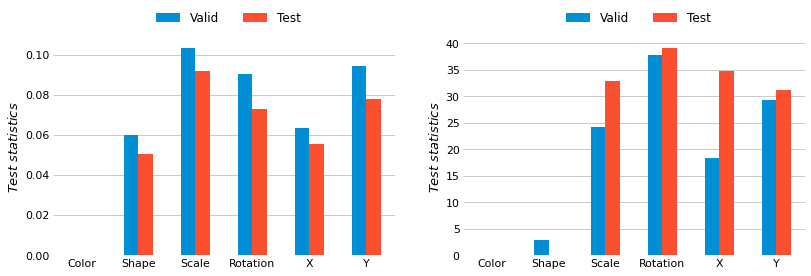

---

**Shift intensity**: medium

**# Test sample**: 1000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

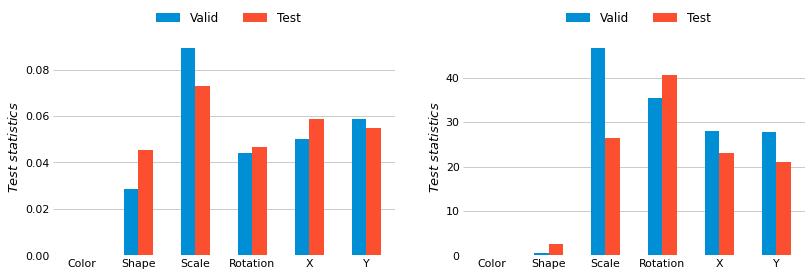

---

**Shift intensity**: medium

**# Test sample**: 10000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

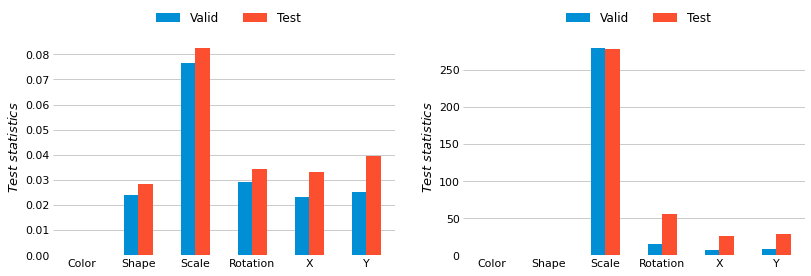

---

**Shift intensity**: large

**# Test sample**: 500

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

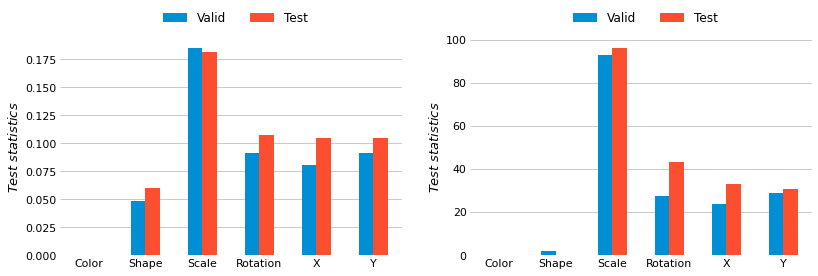

---

**Shift intensity**: large

**# Test sample**: 1000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

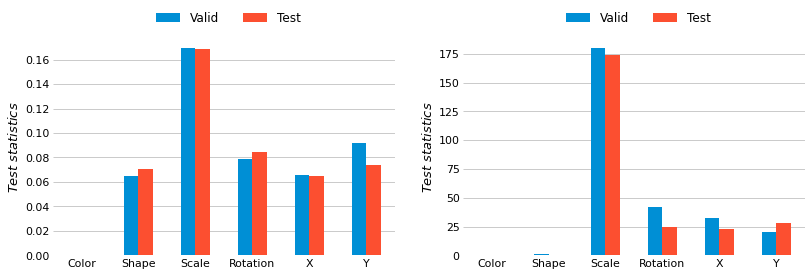

---

**Shift intensity**: large

**# Test sample**: 10000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

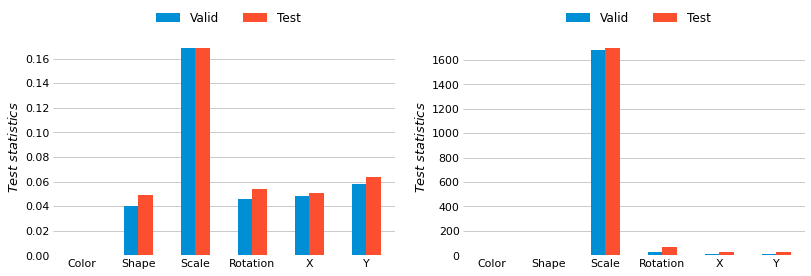

In [8]:
## Consider "bigger" and most significant shifts
shift_intensity_list = ["medium", "large"]
shift_prop_list = [1.0] # does not matter in knockout
test_sample_list = [500, 1000, 10000]
barplot_test_statistics(dict_result_bbsds, dict_result_bbsdh,
                        concept_names, shift_intensity_list, 
                        shift_prop_list, test_sample_list)

##### Concept Shift (Shape + Scale)

In [9]:
shift_type = ["concept_scale", "concept_shape"]
dict_result_bbsds = load_dict_result(shift_type, "BBSDs_concepts")
dict_result_bbsdh = load_dict_result(shift_type, "BBSDh_concepts")

Loading file successfully.
Loading file successfully.


---

**Shift intensity**: medium

**# Test sample**: 500

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

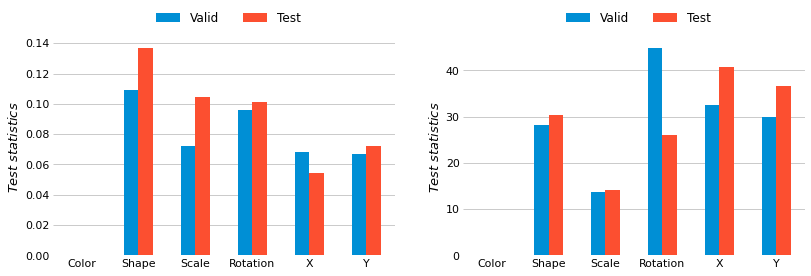

---

**Shift intensity**: medium

**# Test sample**: 1000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

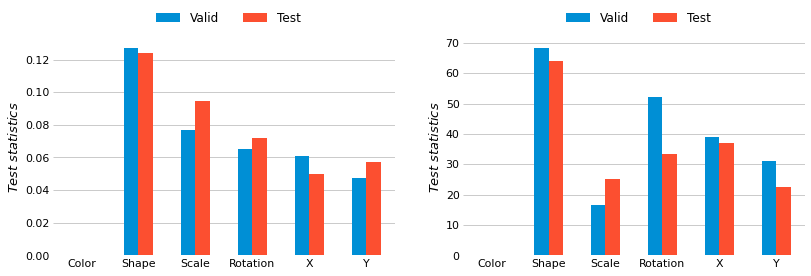

---

**Shift intensity**: medium

**# Test sample**: 10000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

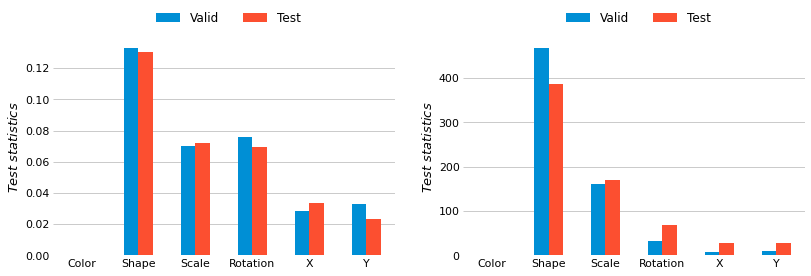

---

**Shift intensity**: large

**# Test sample**: 500

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

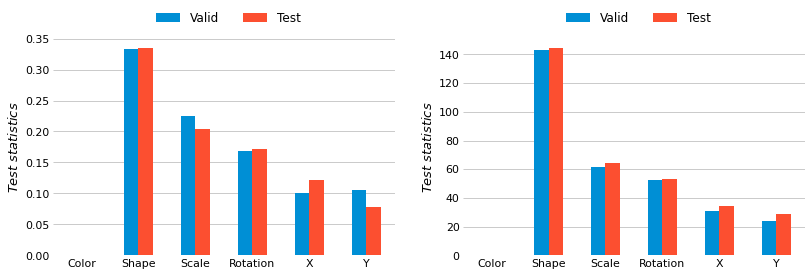

---

**Shift intensity**: large

**# Test sample**: 1000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

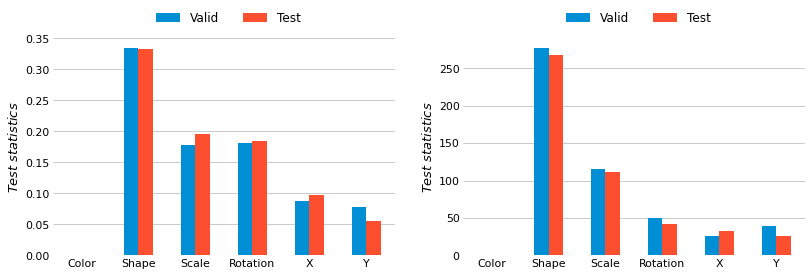

---

**Shift intensity**: large

**# Test sample**: 10000

**Detection valid (BBSDs)**: True

**Detection valid (BBSDh)**: True

**Detection test (BBSDs)**: True

**Detection test (BBSDh)**: True

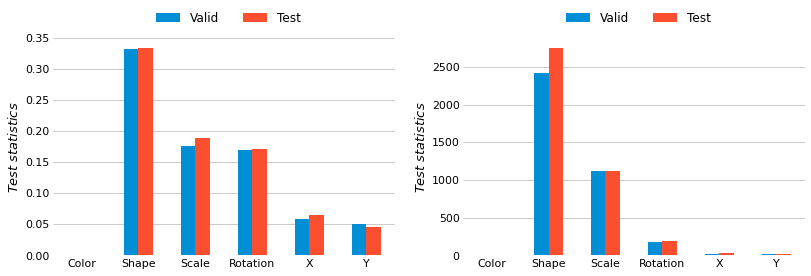

In [10]:
## Consider "bigger" and most significant shifts
shift_intensity_list = ["medium", "large"]
shift_prop_list = [1.0] # does not matter in knockout
test_sample_list = [500, 1000, 10000]
barplot_test_statistics(dict_result_bbsds, dict_result_bbsdh,
                        concept_names, shift_intensity_list, 
                        shift_prop_list, test_sample_list)

#### Tables

##### Knockout Shift
*Intensities vs # of samples*  
Here we display tables of detection accuracy as a function of shift intensities and sample size. Note that the shift proportion and shift intensity is the same in knockout shift case.

In [ ]:
shift_type = "ko"
dict_result_bbsds = load_dict_result(shift_type, "BBSDs_concepts")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsds["valid"], is_concept=True, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsds["test"], is_concept=True, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.15,0.0,0.1,0.15,0.0,0.15,0.2,0.95
Medium,0.05,0.2,0.2,0.55,1.0,1.00,1.0,1.00
Large,0.15,0.5,1.0,1.00,1.0,1.00,1.0,1.00


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.05,0.15,0.10,0.05,0.10,0.3,0.25,1.0
Medium,0.00,0.20,0.45,0.80,0.85,1.0,1.00,1.0
Large,0.15,0.70,1.00,1.00,1.00,1.0,1.00,1.0


##### Concept Shift (Scale)

In [ ]:
shift_type = "concept_scale"
dict_result_bbsds = load_dict_result(shift_type, "BBSDs_concepts")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsds["valid"], is_concept=True, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsds["test"], is_concept=True, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.10,0.15,0.10,0.0,0.05,0.05,0.2,0.0
Medium,0.00,0.15,0.05,0.3,0.45,0.95,1.0,1.0
Large,0.05,0.15,0.55,0.9,1.00,1.00,1.0,1.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.05,0.0,0.15,0.15,0.15,0.15,0.15,0.2
Medium,0.05,0.2,0.10,0.20,0.55,0.90,1.00,1.0
Large,0.15,0.2,0.30,0.80,1.00,1.00,1.00,1.0


##### Concept Shift (Shape + Scale)

In [ ]:
shift_type = ["concept_scale", "concept_shape"]
dict_result_bbsds = load_dict_result(shift_type, "BBSDs_concepts")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsds["valid"], is_concept=True, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsds["test"], is_concept=True, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.1,0.1,0.2,0.0,0.3,0.3,0.1,0.9
Medium,0.1,0.2,0.2,0.4,0.9,1.0,1.0,1.0
Large,0.2,0.4,1.0,1.0,1.0,1.0,1.0,1.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.1,0.3,0.2,0.0,0.2,0.2,0.1,0.8
Medium,0.0,0.4,0.0,0.7,1.0,1.0,1.0,1.0
Large,0.0,0.4,1.0,1.0,1.0,1.0,1.0,1.0


### BBSDh (Concepts)

The BBSDh (concepts) use the argmax outputs of each concept predictions as the reduced representation before applying multiple univariate and multidimensional statistical tests. See previous section for description about visualisations considered.

##### Knockout Shift 
*Intensities vs # of samples*  
Here we display tables of detection accuracy as a function of shift intensities and sample size. Note that the shift proportion and shift intensity is the same in knockout shift case.

In [ ]:
shift_type = "ko"
dict_result_bbsdh = load_dict_result(shift_type, "BBSDh_concepts")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsdh["valid"], is_concept=True, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsdh["test"], is_concept=True, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.2,0.3,0.1,0.3,0.0,0.2,0.3,1.0
Medium,0.3,0.5,0.5,0.7,1.0,1.0,1.0,1.0
Large,0.3,0.8,1.0,1.0,1.0,1.0,1.0,1.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.1,0.4,0.6,0.2,0.1,0.2,0.3,1.0
Medium,0.1,0.4,0.5,0.8,1.0,1.0,1.0,1.0
Large,0.4,0.7,1.0,1.0,1.0,1.0,1.0,1.0


##### Concept Shift (Scale)

In [ ]:
shift_type = "concept_scale"
dict_result_bbsdh = load_dict_result(shift_type, "BBSDh_concepts")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsdh["valid"], is_concept=True, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsdh["test"], is_concept=True, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.3,0.4,0.1,0.1,0.1,0.1,0.3,0.4
Medium,0.2,0.2,0.4,0.7,0.8,1.0,1.0,1.0
Large,0.4,0.7,0.7,1.0,1.0,1.0,1.0,1.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.2,0.4,0.2,0.2,0.3,0.0,0.4,1.0
Medium,0.2,0.2,0.3,0.5,0.8,1.0,1.0,1.0
Large,0.3,0.4,0.7,1.0,1.0,1.0,1.0,1.0


##### Concept Shift (Shape + Scale)

In [ ]:
shift_type = ["concept_scale", "concept_shape"]
dict_result_bbsdh = load_dict_result(shift_type, "BBSDh_concepts")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsdh["valid"], is_concept=True, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsdh["test"], is_concept=True, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.4,0.2,0.4,0.3,0.3,0.2,0.2,1.0
Medium,0.4,0.4,0.6,0.7,1.0,1.0,1.0,1.0
Large,0.4,0.9,1.0,1.0,1.0,1.0,1.0,1.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.1,0.3,0.2,0.0,0.3,0.3,0.2,1.0
Medium,0.3,0.3,0.5,0.8,1.0,1.0,1.0,1.0
Large,0.1,0.9,1.0,1.0,1.0,1.0,1.0,1.0



### BBSDs 
The BBSDs use the softmax outputs of the target class as the reduced representation before applying multiple univariate and multidimensional statistical tests. Main visualisations are discussed in earlier section.

##### Knockout Shift

*Intensities vs # of samples*  
Here we display tables of detection accuracy as a function of shift intensities and sample size. Note that the shift proportion and shift intensity is the same in knockout shift case.

In [ ]:
shift_type = "ko"
dict_result_bbsds = load_dict_result(shift_type, "BBSDs")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsds["valid"], is_concept=False, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsds["test"], is_concept=False, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.1,0.0,0.1,0.0,0.0,0.0,0.3,1.0
Medium,0.0,0.1,0.3,0.6,1.0,1.0,1.0,1.0
Large,0.0,0.3,1.0,1.0,1.0,1.0,1.0,1.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.1,0.2,0.0,0.2,0.1,0.0,0.1,0.8
Medium,0.1,0.1,0.0,0.6,0.9,1.0,1.0,1.0
Large,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0


##### Concept Shift (Scale)

In [ ]:
shift_type = "concept_scale"
dict_result_bbsds = load_dict_result(shift_type, "BBSDs")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsds["valid"], is_concept=False, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsds["test"], is_concept=False, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Medium,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0
Large,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
Medium,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0
Large,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0


##### Concept Shift (Shape + Scale)

In [ ]:
shift_type = ["concept_scale", "concept_shape"]
dict_result_bbsds = load_dict_result(shift_type, "BBSDs")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsds["valid"], is_concept=False, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsds["test"], is_concept=False, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.9
Medium,0.0,0.2,0.5,0.4,1.0,1.0,1.0,1.0
Large,0.2,0.5,1.0,1.0,1.0,1.0,1.0,1.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.0,0.0,0.1,0.1,0.0,0.2,0.0,0.9
Medium,0.0,0.0,0.5,0.5,0.9,1.0,1.0,1.0
Large,0.3,0.5,1.0,1.0,1.0,1.0,1.0,1.0



### BBSDh
The BBSDh use the argmax outputs of the target class as the reduced representation before applying multiple univariate and multidimensional statistical tests. Main visualisations are discussed in earlier section.

##### Knockout Shift
*Intensities vs # of samples*  
Here we display tables of detection accuracy as a function of shift intensities and sample size. Note that the shift proportion and shift intensity is the same in knockout shift case.

In [ ]:
shift_type = "ko"
dict_result_bbsdh = load_dict_result(shift_type, "BBSDh")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsdh["valid"], is_concept=False, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsdh["test"], is_concept=False, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.2,0.2,0.0,0.1,0.0,0.1,0.3,1.0
Medium,0.3,0.4,0.5,0.7,1.0,1.0,1.0,1.0
Large,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.2,0.1,0.0,0.0,0.0,0.2,0.0,0.8
Medium,0.2,0.2,0.2,0.7,1.0,1.0,1.0,1.0
Large,0.0,0.7,1.0,1.0,1.0,1.0,1.0,1.0


##### Concept Shift (Scale)

In [ ]:
shift_type = "concept_scale"
dict_result_bbsdh = load_dict_result(shift_type, "BBSDh")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsdh["valid"], is_concept=False, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsdh["test"], is_concept=False, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.0,0.1,0.2,0.0,0.0,0.1,0.0,0.0
Medium,0.0,0.0,0.2,0.0,0.0,0.0,0.1,0.0
Large,0.1,0.1,0.0,0.2,0.1,0.0,0.0,0.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
Medium,0.1,0.0,0.0,0.1,0.1,0.2,0.1,0.0
Large,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0


##### Concept Shift (Shape + Scale)

In [ ]:
shift_type = ["concept_scale", "concept_shape"]
dict_result_bbsdh = load_dict_result(shift_type, "BBSDh")

Loading file successfully.


In [ ]:
display(Markdown("*Valid*"))
display(single_intensity_vs_samples(dict_result_bbsdh["valid"], is_concept=False, display_md=False))
print("\n")
display(Markdown("*Test*"))
display(single_intensity_vs_samples(dict_result_bbsdh["test"], is_concept=False, display_md=False))

*Valid*

,10,20,50,100,200,500,1000,10000
Small,0.0,0.0,0.1,0.1,0.3,0.2,0.1,1.0
Medium,0.0,0.2,0.7,0.8,0.7,1.0,1.0,1.0
Large,0.1,0.8,1.0,1.0,1.0,1.0,1.0,1.0


*Test*

,10,20,50,100,200,500,1000,10000
Small,0.1,0.1,0.0,0.0,0.1,0.2,0.1,0.7
Medium,0.0,0.1,0.4,0.7,1.0,1.0,1.0,1.0
Large,0.1,0.5,1.0,1.0,1.0,1.0,1.0,1.0


### Summary Figures

This section plot several additional figures summarising several experimentation results.

#### Detection Accuracy vs Test Samples
The figure plot how detection accuracy changes over different test (real-world) samples provided to each shift detector method to detect whether there are shifts between data that we have and unseen real-world data. We should observe general pattern that the shift detector methods should be more accurate when given more real-world data.

##### Knockout Shift

In [11]:
shift_type = "ko"
dict_result_1 = load_dict_result(shift_type, "BBSDs_concepts")
dict_result_2 = load_dict_result(shift_type, "BBSDh_concepts")
dict_result_3 = load_dict_result(shift_type, "BBSDs")
dict_result_4 = load_dict_result(shift_type, "BBSDh")
list_dict_result = [dict_result_1, dict_result_2, dict_result_3, dict_result_4]
list_is_concepts = [True, True, False, False]
list_labels = ["BBSDs (Concepts)", "BBSDh (Concepts)", "BBSDs", "BBSDh"]

Loading file successfully.
Loading file successfully.
Loading file successfully.
Loading file successfully.


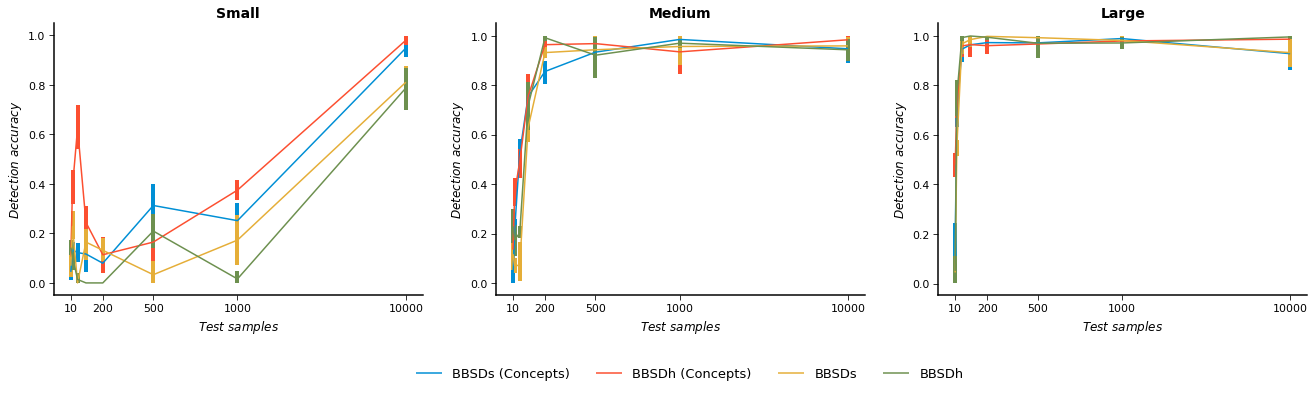

In [12]:
# Plot the figures
plot_accuracy_vs_samples(list_dict_result, list_labels, list_is_concepts, shift_prop=1.0)

##### Concept Shift

In [13]:
# List of concept shifts that we consider
shift_type_list = ["concept_scale",
                   ["concept_shape", "concept_scale"],
                   "concept_x",
                   "concept_y",
                   ["concept_x", "concept_y"],
                   ["concept_x", "concept_y", "scale"],
                   ["concept_x", "concept_y", "scale", "shape"]
]

In [ ]:
# Iterate over shift type and plot
for shift_type in shift_type_list:
    dict_result_1 = load_dict_result(shift_type, "BBSDs_concepts")
    dict_result_2 = load_dict_result(shift_type, "BBSDh_concepts")
    dict_result_3 = load_dict_result(shift_type, "BBSDs")
    dict_result_4 = load_dict_result(shift_type, "BBSDh")
    list_dict_result = [dict_result_1, dict_result_2, dict_result_3, dict_result_4]
    list_is_concepts = [True, True, False, False]
    list_labels = ["BBSDs (Concepts)", "BBSDh (Concepts)", "BBSDs", "BBSDh"]

    # Show the name of the shift
    display(Markdown(f"**Detection Accuracy vs. # of Samples**"))
    display(Markdown(f"**Shift type**: {shift_type}")) 

    # Plot the detection accuracy vs # of samples
    plot_accuracy_vs_samples(list_dict_result, list_labels, list_is_concepts, shift_prop=1.0)
    display(Markdown(f"---"))